In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [31]:
df = pd.read_csv("cleaned_playstore.csv")

In [32]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated day,Last Updated month,Last Updated year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3,7,1,2018


In [33]:
df.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated day,Last Updated month,Last Updated year
8520,Fast Download Manager,TOOLS,4.0,18478,1700.0,1000000,Free,0.0,Everyone,Tools,1.0.5,2.3,4,8,2018
496,Black People Meet Singles Date,DATING,3.9,10212,5000.0,1000000,Free,0.0,Mature 17+,Dating,1.9.7,4.4,25,7,2018


In [34]:
df.shape

(10840, 15)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 10840 non-null  object 
 1   Category            10840 non-null  object 
 2   Rating              9366 non-null   float64
 3   Reviews             10840 non-null  int64  
 4   Size                9145 non-null   float64
 5   Installs            10840 non-null  int64  
 6   Type                10839 non-null  object 
 7   Price               10840 non-null  float64
 8   Content Rating      10840 non-null  object 
 9   Genres              10840 non-null  object 
 10  Current Ver         10832 non-null  object 
 11  Android Ver         9476 non-null   object 
 12  Last Updated day    10840 non-null  int64  
 13  Last Updated month  10840 non-null  int64  
 14  Last Updated year   10840 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.2+

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9366.0,4.191757e+00,5.152189e-01,1.0,4.0,4.3,4.5,5.000000e+00
Reviews,10840.0,4.441529e+05,2.927761e+06,0.0,38.0,2094.0,54775.5,7.815831e+07
Size,9145.0,2.150653e+04,2.259602e+04,10.0,4900.0,13000.0,30000.0,1.000000e+05
Installs,10840.0,1.546434e+07,8.502936e+07,0.0,1000.0,100000.0,5000000.0,1.000000e+09
Price,10840.0,1.027368e+00,1.594970e+01,0.0,0.0,0.0,0.0,4.000000e+02
Last Updated day,10840.0,1.560904e+01,9.561621e+00,1.0,6.0,16.0,24.0,3.100000e+01
Last Updated month,10840.0,6.422325e+00,2.578388e+00,1.0,5.0,7.0,8.0,1.200000e+01
Last Updated year,10840.0,2.017400e+03,1.100914e+00,2010.0,2017.0,2018.0,2018.0,2.018000e+03


In [37]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Last Updated day', 'Last Updated month', 'Last Updated year'],
      dtype='object')

In [38]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated day,Last Updated month,Last Updated year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,Varies with device,4.0.3,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,Varies with device,NaN,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2.19.0.204537701,4.4,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,4.1.28165.0716,4.0,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,4.3.0.508,4.4,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,Varies with device,NaN,6,4,2018
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,Varies with device,NaN,6,8,2018
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,Varies with device,NaN,27,6,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86000.0,10000,Free,0.0,Everyone,Medical,0.6.88,5.0,1,6,2018


In [39]:
df[df.duplicated("App")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated day,Last Updated month,Last Updated year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,Varies with device,4.0.3,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,Varies with device,NaN,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2.19.0.204537701,4.4,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,4.1.28165.0716,4.0,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,4.3.0.508,4.4,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10714,FarmersOnly Dating,DATING,3.0,1145,1400.0,100000,Free,0.0,Mature 17+,Dating,2.2,4.0,25,2,2016
10719,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000.0,1000000,Free,0.0,Everyone,Communication,5.2,5.0,6,7,2018
10729,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2.1.0.372,4.4,24,3,2018
10752,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,3.9,4.4,30,7,2018


In [40]:
df = df.drop_duplicates(subset = ["App"],keep="first")

In [41]:
df.shape

(9659, 15)

In [42]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']


In [43]:
print("categorical_features",categorical_features)

categorical_features ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [44]:
print("numerical_features",numerical_features)

numerical_features ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated day', 'Last Updated month', 'Last Updated year']


In [45]:
df[categorical_features]

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,1.1,4.4
...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,1.48,4.1
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,1.0,4.1
10837,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,1.0,2.2
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,Varies with device,NaN


In [46]:
df[numerical_features]

,Rating,Reviews,Size,Installs,Price,Last Updated day,Last Updated month,Last Updated year
0,4.1,159,19000.0,10000,0.0,7,1,2018
1,3.9,967,14000.0,500000,0.0,15,1,2018
2,4.7,87510,8700.0,5000000,0.0,1,8,2018
3,4.5,215644,25000.0,50000000,0.0,8,6,2018
4,4.3,967,2800.0,100000,0.0,20,6,2018
...,...,...,...,...,...,...,...,...
10835,4.5,38,53000.0,5000,0.0,25,7,2017
10836,5.0,4,3600.0,100,0.0,6,7,2018
10837,NaN,3,9500.0,1000,0.0,20,1,2017
10838,4.5,114,NaN,1000,0.0,19,1,2015


In [47]:
df["Type"].value_counts(normalize = True)*100

Free    92.172292
Paid     7.827708
Name: Type, dtype: float64

In [48]:
for i in categorical_features:
    
    print(df[i].value_counts(normalize = True)*100,"\n")
    print("=========================================================")

Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: App, Length: 9659, dtype: float64 

FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE                 3.571798
SPORTS      

<AxesSubplot: xlabel='Type', ylabel='count'>

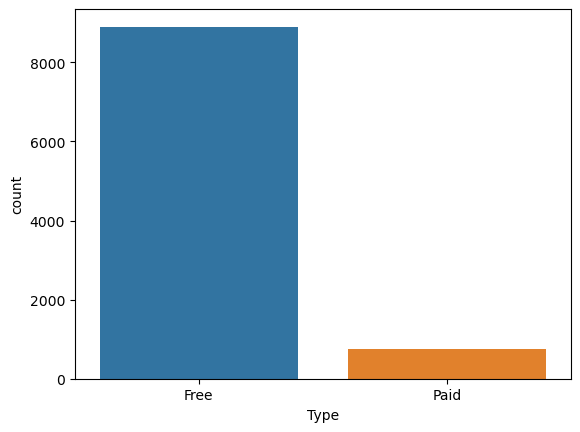

In [49]:
sns.countplot(x =df["Type"])

<AxesSubplot: xlabel='Content Rating', ylabel='count'>

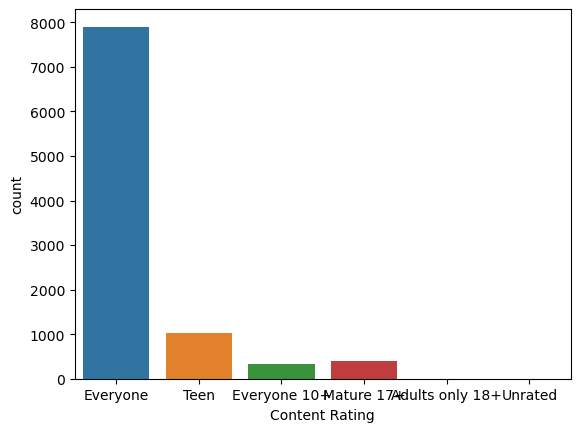

In [50]:
sns.countplot(x =df["Content Rating"])

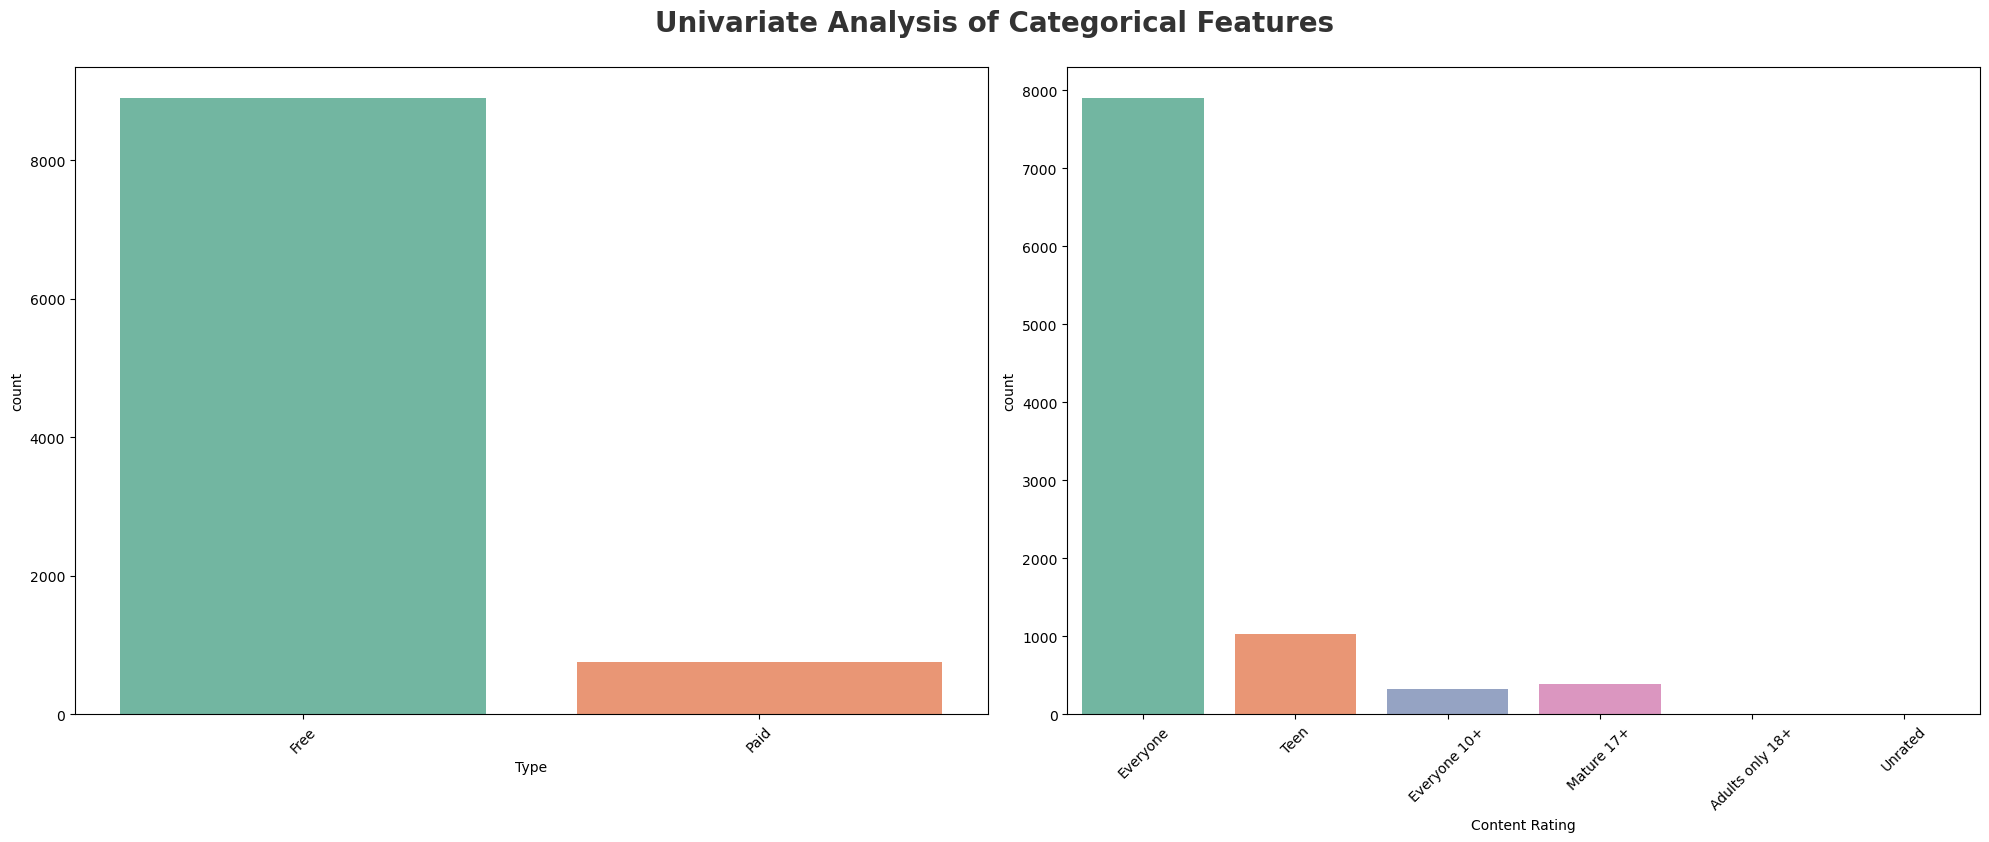

In [51]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

In [52]:
numerical_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last Updated day',
 'Last Updated month',
 'Last Updated year']

<AxesSubplot: xlabel='Price', ylabel='Density'>

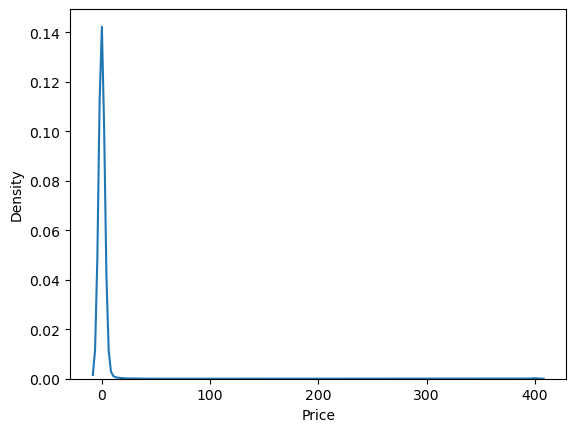

In [53]:
sns.kdeplot(df['Price'])

<AxesSubplot: xlabel='Rating', ylabel='Density'>

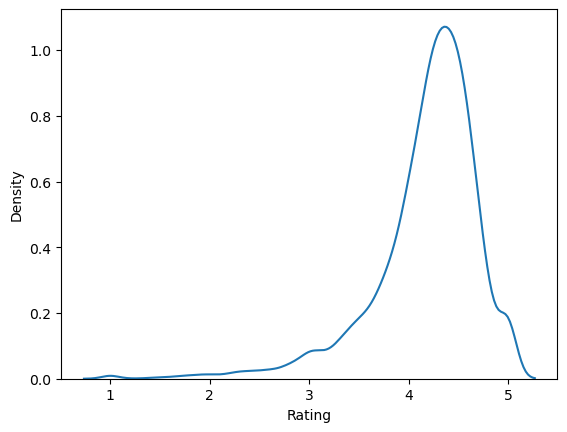

In [54]:
sns.kdeplot(df['Rating'])

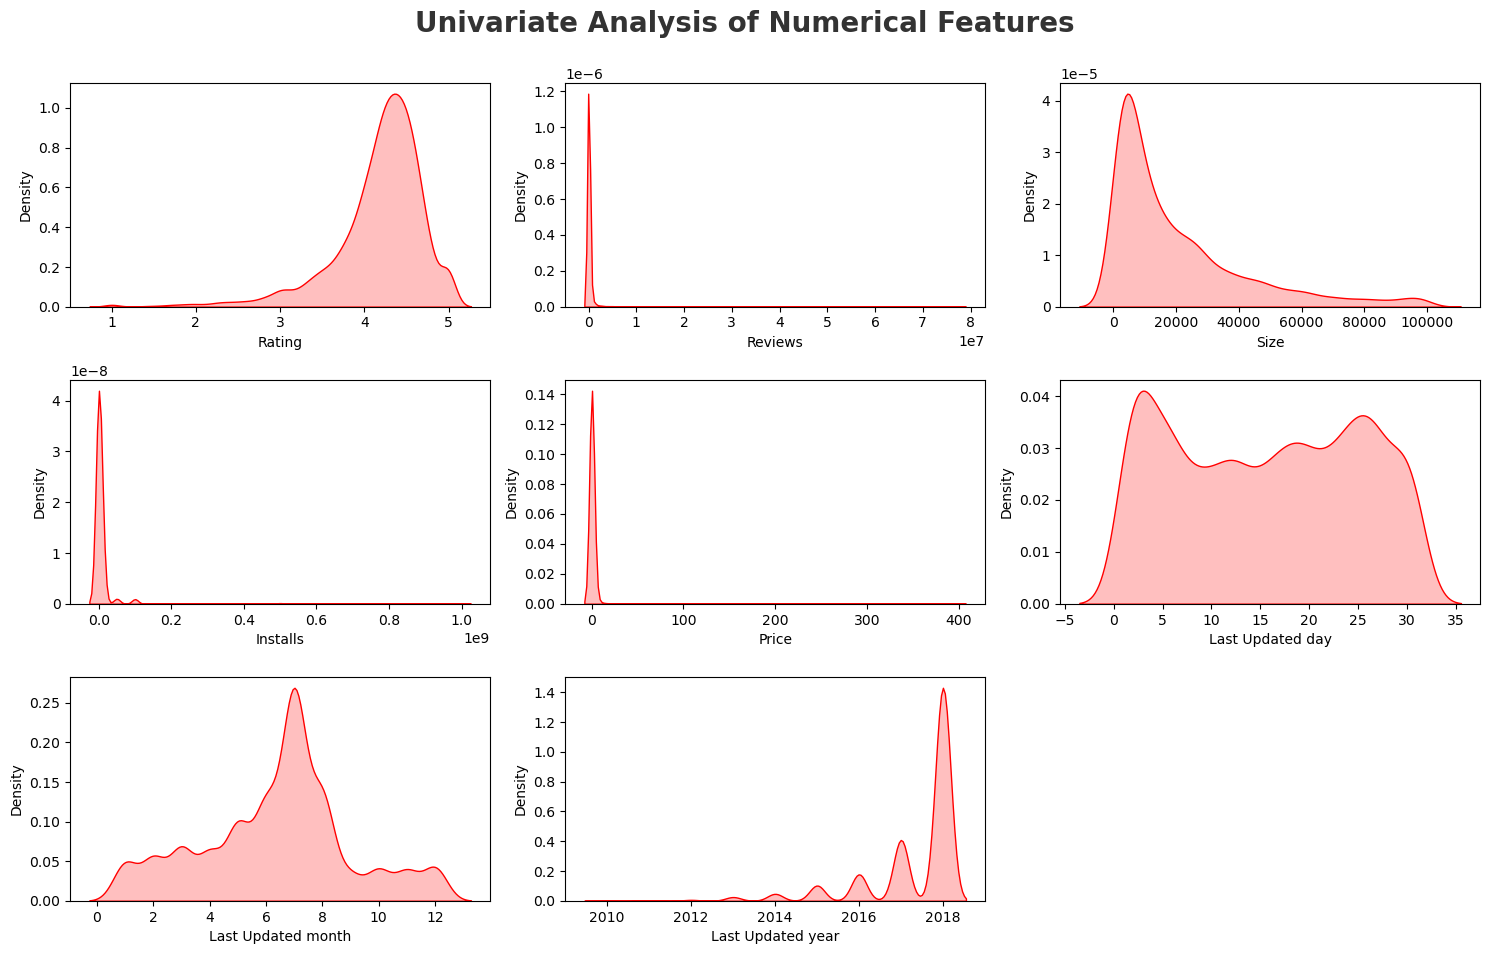

In [56]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()


In [57]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated day,Last Updated month,Last Updated year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4,20,6,2018


In [58]:
#univaraint analysis
#most popular category in app


<AxesSubplot: ylabel='Category'>

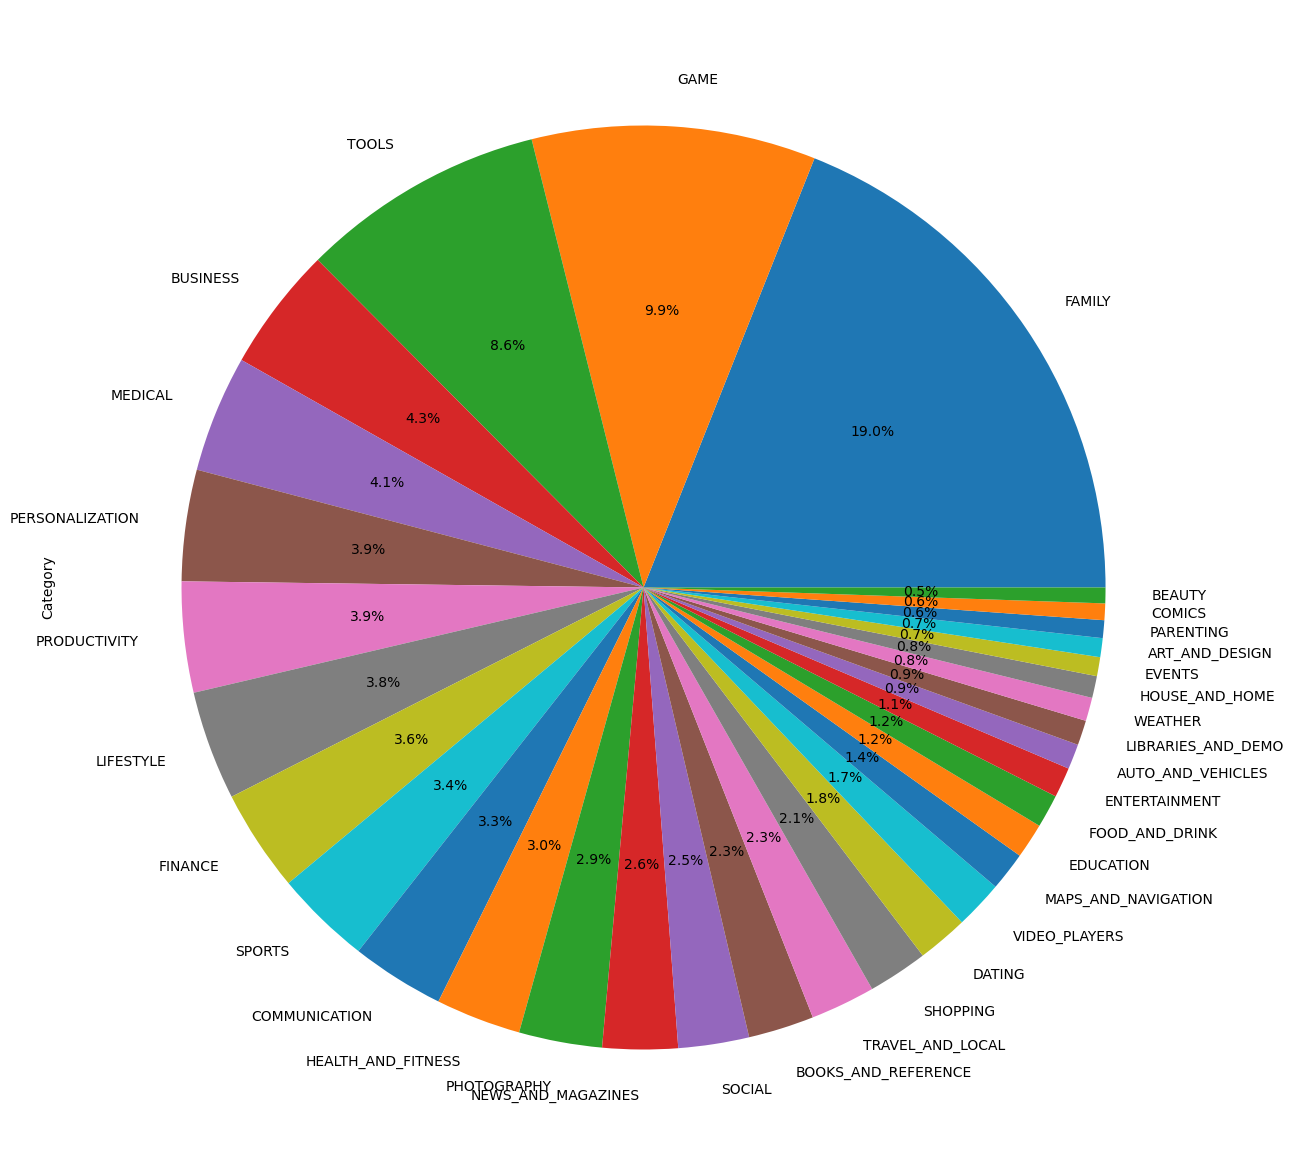

In [69]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,15),autopct="%1.1f%%")

In [74]:
#top 10 Category
df_cat = df['Category'].value_counts()[:10]
df_cat

FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: Category, dtype: int64

In [77]:
category = pd.DataFrame(df['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)
category

,Count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


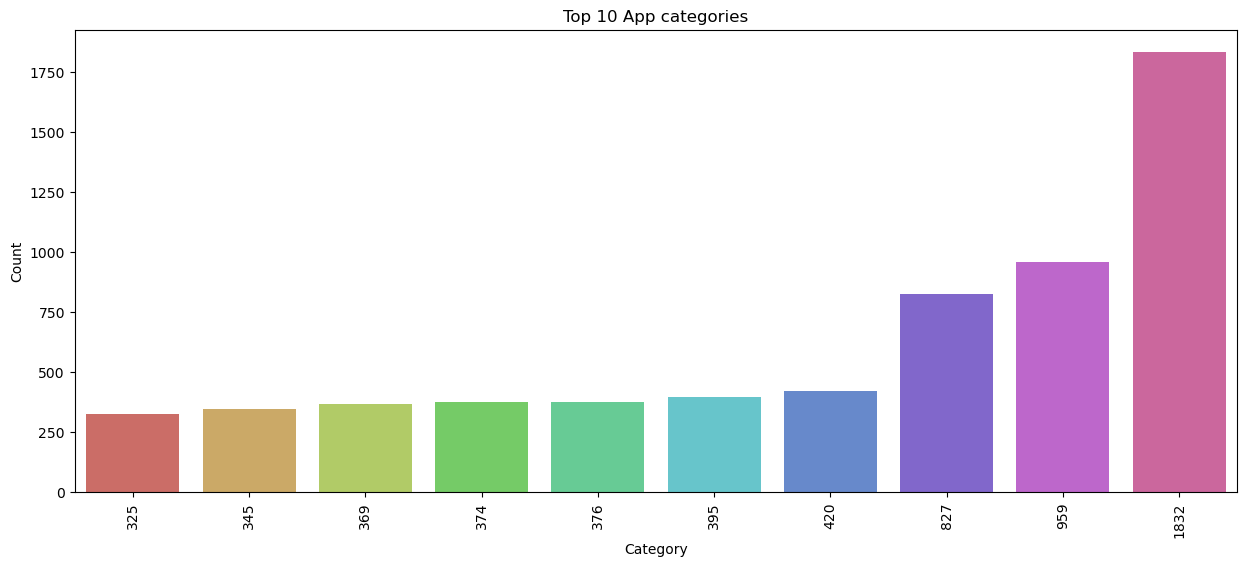

In [78]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_cat, y ='Count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

In [80]:
df.head(2)
#which category having the largest no of installs


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated day,Last Updated month,Last Updated year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3,15,1,2018


In [86]:
df['Category'][df['Installs'] == df['Installs'].max()]

152     BOOKS_AND_REFERENCE
335           COMMUNICATION
336           COMMUNICATION
338           COMMUNICATION
340           COMMUNICATION
341           COMMUNICATION
391           COMMUNICATION
865           ENTERTAINMENT
1654                   GAME
2544                 SOCIAL
2545                 SOCIAL
2554                 SOCIAL
2808            PHOTOGRAPHY
3117       TRAVEL_AND_LOCAL
3127       TRAVEL_AND_LOCAL
3234                  TOOLS
3454           PRODUCTIVITY
3665          VIDEO_PLAYERS
3687          VIDEO_PLAYERS
3736     NEWS_AND_MAGAZINES
Name: Category, dtype: object

In [97]:
df_cat_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending = False).reset_index()

In [98]:
df_cat_installs

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


In [99]:
df2 = df_cat_installs.head(10)
df2

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


<AxesSubplot: xlabel='Installs', ylabel='Category'>

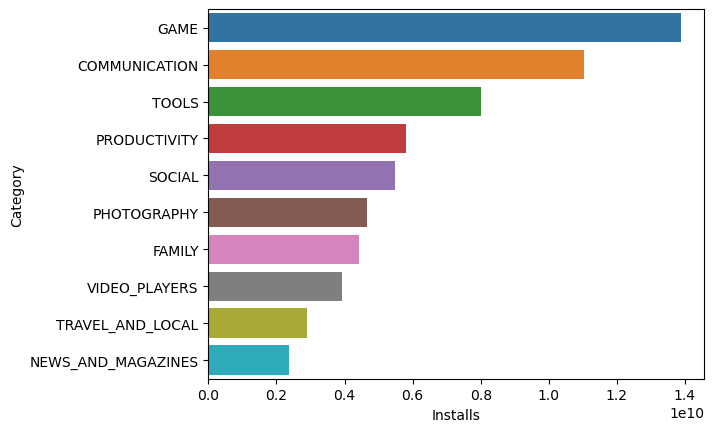

In [107]:
sns.barplot(data=df2,y = "Category",x="Installs")


Text(0.5, 1.0, 'Most Popular Categories in Play Store')

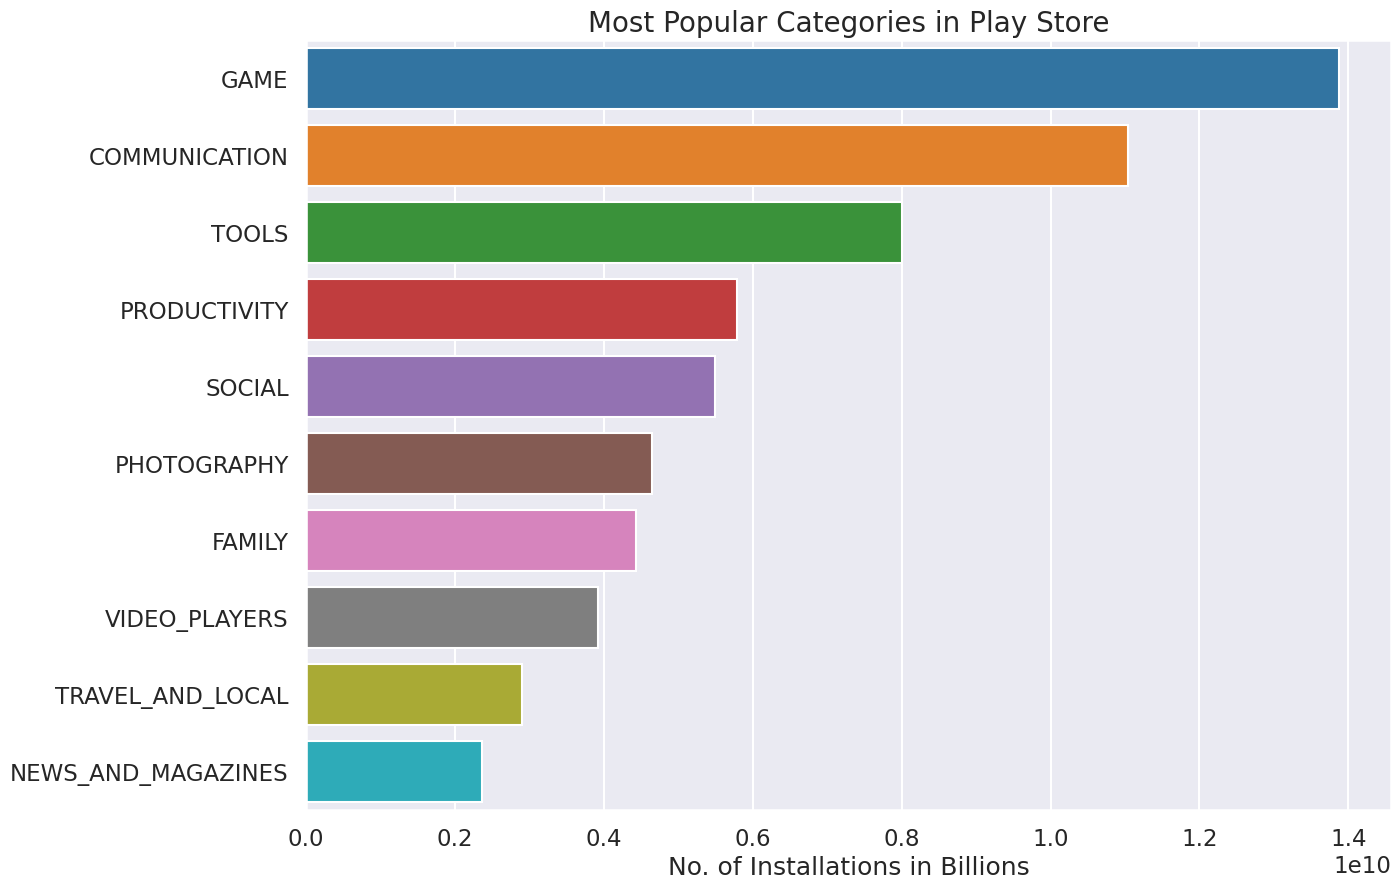

In [108]:
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

In [109]:
#What are the top 5 most installed apps in each categories

In [132]:
dfa = df.groupby(['Category','App'])['Installs'].sum().reset_index()

In [133]:
dfa

,Category,App,Installs
0,ART_AND_DESIGN,350 Diy Room Decor Ideas,10000
1,ART_AND_DESIGN,3D Color Pixel by Number - Sandbox Art Coloring,100000
2,ART_AND_DESIGN,AJ Styles HD Wallpapers,5000
3,ART_AND_DESIGN,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,1000
4,ART_AND_DESIGN,Ai illustrator viewer,100000
...,...,...,...
9654,WEATHER,Yahoo Weather,10000000
9655,WEATHER,Yahoo! Weather for SH Forecast for understandi...,1000000
9656,WEATHER,Yandex.Weather,10000000
9657,WEATHER,weather - weather forecast,1000000


In [138]:
dfa = dfa.sort_values('Installs',ascending=False)

In [146]:
dfa[dfa.Category == 'GAME'][:5]

,Category,App,Installs
4773,GAME,Subway Surfers,1000000000
4167,GAME,Candy Crush Saga,500000000
4628,GAME,Pou,500000000
4802,GAME,Temple Run 2,500000000
4580,GAME,My Talking Tom,500000000


In [147]:
dfa[dfa.Category=='PRODUCTIVITY'][:5]

,Category,App,Installs
7427,PRODUCTIVITY,Google Drive,1000000000
7472,PRODUCTIVITY,Microsoft Word,500000000
7425,PRODUCTIVITY,Google Calendar,500000000
7364,PRODUCTIVITY,Dropbox,500000000
7334,PRODUCTIVITY,Cloud Print,500000000


In [148]:
dfa[dfa.Category=='FAMILY'][:5]

,Category,App,Installs
3333,FAMILY,Tom Loves Angela,100000000
3290,FAMILY,Talking Tom Cat 2,100000000
1976,FAMILY,Bitmoji – Your Personal Emoji,100000000
3289,FAMILY,Talking Tom Cat,100000000
3287,FAMILY,Talking Tom & Ben News,100000000


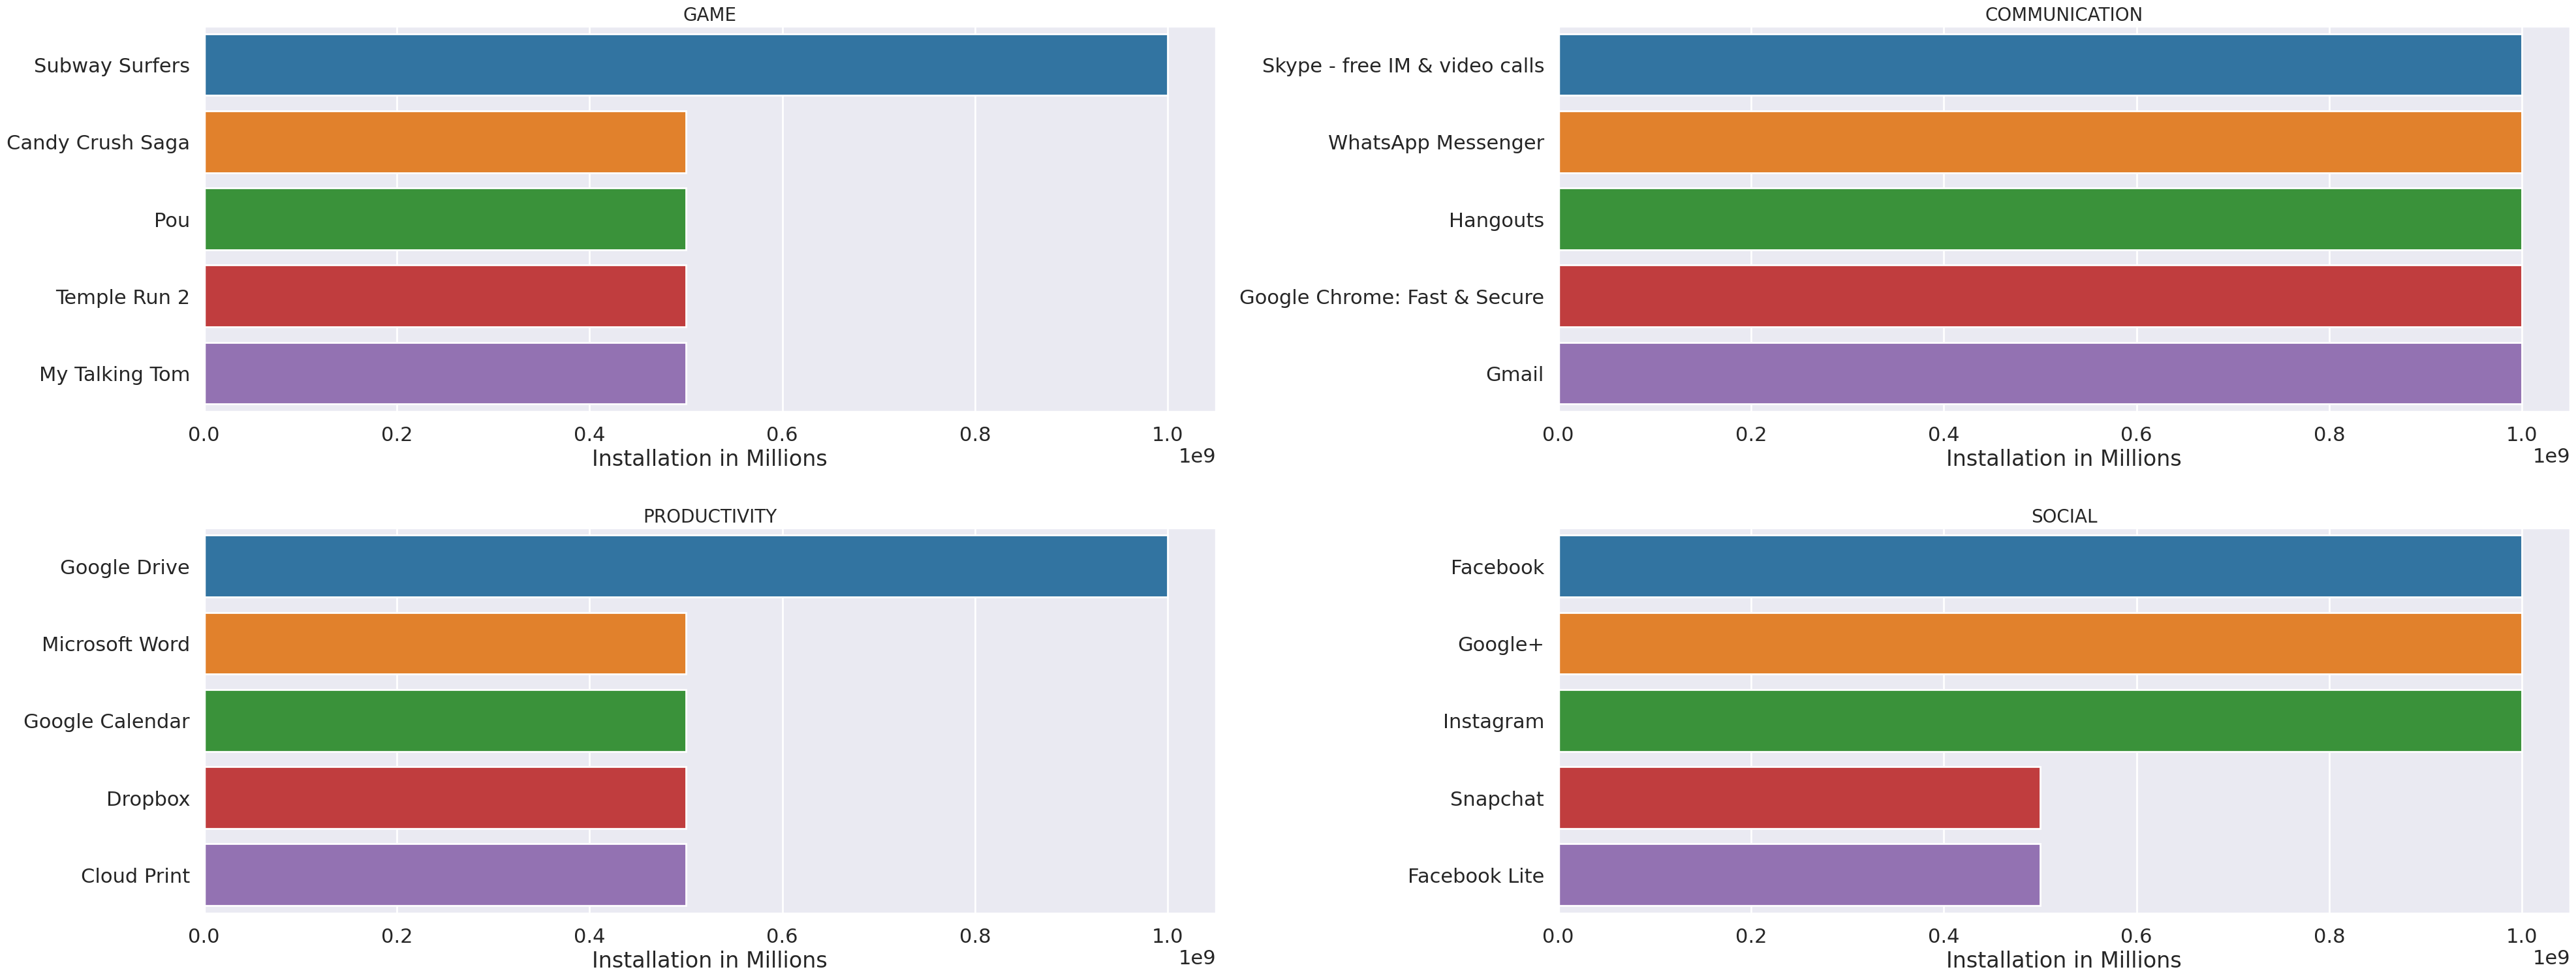

In [149]:
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [150]:
# How many apps in playstore with 5 Rating

In [158]:
df[['App','Category','Installs']][df['Rating'] == 5]

,App,Category,Installs
329,Hojiboy Tojiboyev Life Hacks,COMICS,1000
612,American Girls Mobile Numbers,DATING,1000
615,Awake Dating,DATING,100
633,Spine- The dating app,DATING,500
636,Girls Live Talk - Free Text and Video Chat,DATING,100
...,...,...,...
10720,Mad Dash Fo' Cash,GAME,100
10741,GKPB FP Online Church,LIFESTYLE,1000
10775,Monster Ride Pro,GAME,10
10819,Fr. Daoud Lamei,FAMILY,1000
